In [125]:
!pip install pymysql

     |████████████████████████████████| 43 kB 1.3 MB/s eta 0:00:011


In [126]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
import seaborn as sns
import matplotlib.pyplot as plt
from numpy.random import randn
import pymysql
from sqlalchemy import create_engine

In [113]:
#read the data 
data=pd.read_excel("/Users/anak/ironhack/DAFT_NOV_21_01/module_1/Project 3/8 - Primary Education.xlsx")
data

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence Rural,Residence Urban,Wealth quintile Poorest,Wealth quintile Richest,Data source,Time period
0,AGO,Angola,SSA,ESA,Lower middle income (LM),0.15,0.02,0.22,0.00,0.61,Demographic and Health Survey,2015-16
1,ARG,Argentina,LAC,LAC,Upper middle income (UM),0.39,NaN,NaN,NaN,NaN,Multiple Indicator Cluster Survey,2011-12
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81,0.69,0.89,0.46,0.99,Demographic and Health Survey,2015-16
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.34,0.30,0.49,0.07,0.75,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),0.63,0.54,0.68,0.09,0.97,Multiple Indicator Cluster Survey,2012
...,...,...,...,...,...,...,...,...,...,...,...,...
82,URY,Uruguay,LAC,LAC,High income (H),0.63,0.53,0.64,0.37,NaN,Multiple Indicator Cluster Survey,2012-99
83,UZB,Uzbekistan,ECA,EECA,Lower middle income (LM),0.19,0.16,0.26,0.00,0.69,UNICEF Nutrition Survey 2017,2017
84,VNM,Viet Nam,EAP,EAP,NaN,0.58,NaN,0.58,NaN,NaN,STEP Skills Measurement Household Survey 2012 ...,2012
85,ZMB,Zambia,SSA,ESA,Lower middle income (LM),0.06,0.02,0.12,0.00,0.28,Demographic and Health Survey,2018-19


In [123]:
sample_mean, sample_std = np.mean(data['Total']), np.std(data['Total'])
print(sample_mean, sample_std)

0.9110975609756099 5.129393537607793


In [114]:
data.dtypes
#data = pd.DataFrame(data=data, dtype=np.int8)

ISO3                        object
Countries and areas         object
Region                      object
Sub-region                  object
Income Group                object
Total                      float64
Residence Rural            float64
Residence Urban            float64
Wealth quintile Poorest    float64
Wealth quintile Richest    float64
Data source                 object
Time period                 object
dtype: object

In [11]:
data['Income Group'].value_counts()

Upper middle income (UM)    29
Lower middle income (LM)    27
Low income (L)              17
High income (H)              8
Name: Income Group, dtype: int64

0.03     5
0.02     4
0.04     3
0.63     3
0.16     3
0.01     3
0.05     3
0.18     2
0.25     2
0.30     2
0.12     2
0.70     2
0.37     2
0.46     2
0.08     2
0.06     2
0.44     2
0.40     1
0.73     1
0.39     1
0.00     1
0.15     1
0.36     1
0.20     1
0.68     1
0.51     1
0.11     1
0.24     1
0.84     1
0.82     1
47.00    1
0.23     1
0.80     1
0.67     1
0.19     1
0.90     1
0.64     1
0.91     1
0.81     1
0.17     1
0.07     1
0.09     1
0.33     1
0.88     1
0.58     1
0.50     1
0.95     1
0.42     1
0.49     1
0.34     1
0.27     1
0.62     1
0.86     1
0.75     1
0.99     1
Name: Total, dtype: int64

In [14]:
data['Residence Rural'].value_counts()

0.01    11
0.02     5
0.00     4
0.04     4
0.10     3
0.09     3
0.69     3
0.16     2
0.65     2
0.19     2
0.53     2
0.32     2
0.33     2
0.03     2
0.11     1
0.61     1
0.08     1
0.35     1
0.06     1
0.70     1
0.82     1
0.89     1
0.30     1
0.31     1
0.68     1
0.94     1
0.43     1
0.21     1
0.37     1
0.81     1
0.05     1
0.64     1
0.49     1
0.44     1
0.13     1
0.88     1
0.54     1
0.46     1
0.71     1
Name: Residence Rural, dtype: int64

In [15]:
datacopy=data

In [17]:
df_1 = datacopy.dropna( subset =['Residence Rural','Residence Urban','Wealth quintile Poorest','Wealth quintile Richest'] )


In [18]:
df_1

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence Rural,Residence Urban,Wealth quintile Poorest,Wealth quintile Richest,Data source,Time period
0,AGO,Angola,SSA,ESA,Lower middle income (LM),0.15,0.02,0.22,0.00,0.61,Demographic and Health Survey,2015-16
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81,0.69,0.89,0.46,0.99,Demographic and Health Survey,2015-16
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.34,0.30,0.49,0.07,0.75,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),0.63,0.54,0.68,0.09,0.97,Multiple Indicator Cluster Survey,2012
5,BEN,Benin,SSA,WCA,Low income (L),0.03,0.01,0.06,0.00,0.14,Demographic and Health Survey,2017-18
...,...,...,...,...,...,...,...,...,...,...,...,...
74,TON,Tonga,EAP,EAP,Upper middle income (UM),0.90,0.89,0.94,0.82,0.94,Multiple Indicator Cluster Survey,2019
75,TTO,Trinidad and Tobago,LAC,LAC,High income (H),0.42,0.32,0.51,0.02,0.97,Multiple Indicator Cluster Survey,2011
83,UZB,Uzbekistan,ECA,EECA,Lower middle income (LM),0.19,0.16,0.26,0.00,0.69,UNICEF Nutrition Survey 2017,2017
85,ZMB,Zambia,SSA,ESA,Lower middle income (LM),0.06,0.02,0.12,0.00,0.28,Demographic and Health Survey,2018-19


<Figure size 720x432 with 0 Axes>

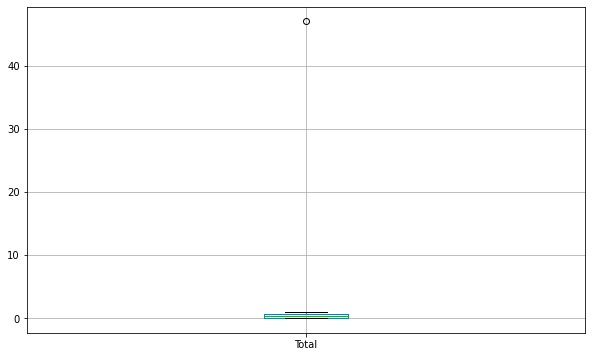

<Figure size 720x432 with 0 Axes>

In [20]:
plt.figure(figsize=(10, 6))
df_1.boxplot(column=['Total'])
plt.figure(figsize=(10, 6))


<Figure size 720x432 with 0 Axes>

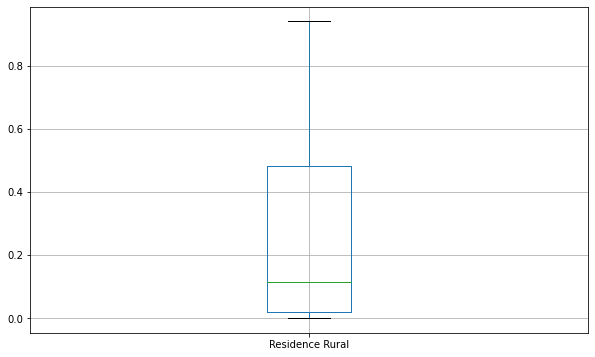

<Figure size 720x432 with 0 Axes>

In [21]:
plt.figure(figsize=(10, 6))
df_1.boxplot(column=['Residence Rural'])
plt.figure(figsize=(10, 6))


<Figure size 720x432 with 0 Axes>

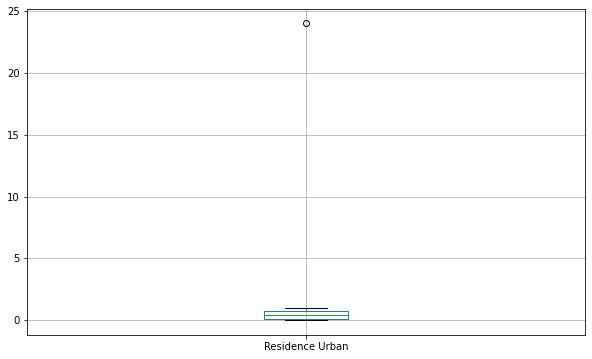

<Figure size 720x432 with 0 Axes>

In [22]:
plt.figure(figsize=(10, 6))
df_1.boxplot(column=['Residence Urban'])
plt.figure(figsize=(10, 6))

<Figure size 720x432 with 0 Axes>

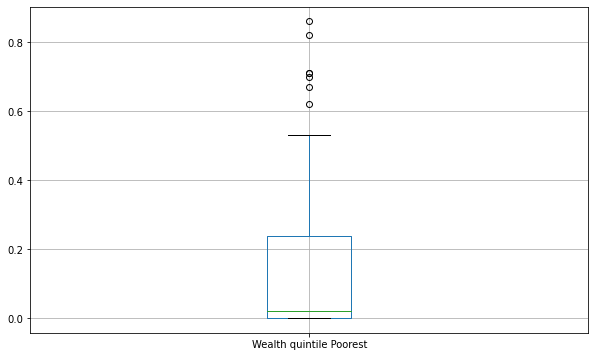

<Figure size 720x432 with 0 Axes>

In [23]:

plt.figure(figsize=(10, 6))
df_1.boxplot(column=['Wealth quintile Poorest'])
plt.figure(figsize=(10, 6))

<Figure size 720x432 with 0 Axes>

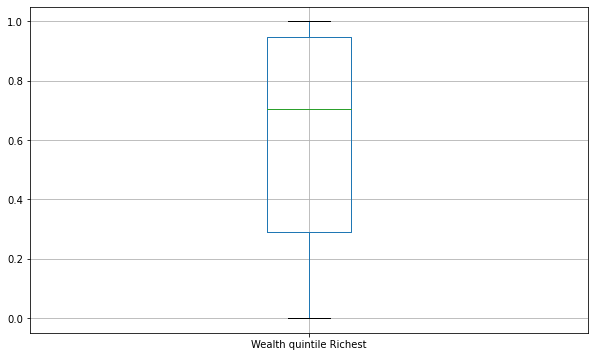

<Figure size 720x432 with 0 Axes>

In [26]:

plt.figure(figsize=(10, 6))
df_1.boxplot(column=['Wealth quintile Richest'])
plt.figure(figsize=(10, 6))




In [29]:
df_1.duplicated().any()

False

In [31]:
df_1.Total

0     0.15
2     0.81
3     0.34
4     0.63
5     0.03
      ... 
74    0.90
75    0.42
83    0.19
85    0.06
86    0.25
Name: Total, Length: 62, dtype: float64

In [55]:
#identifying outliers for Total


# calculate summary statistics
sample_mean, sample_std = np.mean(df_1['Total']), np.std(df_1['Total'])

# identify outliers
cut_off = sample_std * 3
lower, upper = sample_mean - cut_off, sample_mean + cut_off

# identify outliers
outliers = [x for x in df_1['Total'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

print(outliers)

#identifying outliers for Residence Rural
sample_mean, sample_std = np.mean(df_1['Residence Rural']), np.std(df_1['Residence Rural'])


cut_off = sample_std * 3
lower, upper = sample_mean - cut_off, sample_mean + cut_off

outliers = [x for x in df_1['Residence Rural'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

    
print(outliers)

#identifying outliers for Residence Urban
sample_mean, sample_std = np.mean(df_1['Residence Urban']), np.std(df_1['Residence Urban'])


cut_off = sample_std * 3
lower, upper = sample_mean - cut_off, sample_mean + cut_off

outliers = [x for x in df_1['Residence Urban'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
print(outliers)

#identifying outliers for Wealth quintile Poorest
sample_mean, sample_std = np.mean(df_1['Wealth quintile Poorest']), np.std(df_1['Wealth quintile Poorest'])


cut_off = sample_std * 3
lower, upper = sample_mean - cut_off, sample_mean + cut_off

outliers = [x for x in df_1['Wealth quintile Poorest'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))

print(outliers)

#identifying outliers for Wealth quintile Richest
sample_mean, sample_std = np.mean(df_1['Wealth quintile Richest']), np.std(df_1['Wealth quintile Richest'])


cut_off = sample_std * 3
lower, upper = sample_mean - cut_off, sample_mean + cut_off

outliers = [x for x in df_1['Wealth quintile Richest'] if x < lower or x > upper]
print('Identified outliers: %d' % len(outliers))
print(outliers)


Identified outliers: 1
[47.0]
Identified outliers: 0
[]
Identified outliers: 1
[24.0]
Identified outliers: 0
[]
Identified outliers: 0
[]


In [97]:
#ignoring outliers
data_wout=df_1[(df_1['Total']!=47.0) & (df_1['Residence Urban']!=24.0) ]

In [98]:
data_wout

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence Rural,Residence Urban,Wealth quintile Poorest,Wealth quintile Richest,Data source,Time period
0,AGO,Angola,SSA,ESA,Lower middle income (LM),0.15,0.02,0.22,0.00,0.61,Demographic and Health Survey,2015-16
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81,0.69,0.89,0.46,0.99,Demographic and Health Survey,2015-16
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.34,0.30,0.49,0.07,0.75,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),0.63,0.54,0.68,0.09,0.97,Multiple Indicator Cluster Survey,2012
5,BEN,Benin,SSA,WCA,Low income (L),0.03,0.01,0.06,0.00,0.14,Demographic and Health Survey,2017-18
7,BIH,Bosnia and Herzegovina,ECA,EECA,Upper middle income (UM),0.51,0.43,0.68,0.03,0.95,Multiple Indicator Cluster Survey,2011-12
8,BRA,Brazil,LAC,LAC,Upper middle income (UM),0.82,0.49,0.88,0.86,1.00,Brazil Continuous National Household Sample Su...,2018
9,BGR,Bulgaria,ECA,EECA,Upper middle income (UM),0.73,0.65,0.77,0.24,0.98,Bulgarian Longitudinal Inclusive Society Surve...,2013
10,BFA,Burkina Faso,SSA,WCA,Low income (L),0.01,0.01,0.03,0.01,0.04,Demographic and Health Survey,2010
11,CMR,Cameroon,SSA,WCA,Lower middle income (LM),0.04,0.00,0.09,0.00,0.22,Multiple Indicator Cluster Survey,2014


In [103]:

# imputing zero values with median
total_median_value = round(data_wout['Total'].median(), 2)
data_wout['Total']=data_wout['Total'].replace(0,total_median_value)

total_median_value = round(data_wout['Residence Rural'].median(), 2)
data_wout['Residence Rural']=data_wout['Residence Rural'].replace(0,total_median_value)


total_median_value = round(data_wout['Residence Urban'].median(), 2)
data_wout['Residence Urban']=data_wout['Residence Urban'].replace(0,total_median_value)

total_median_value = round(data_wout['Wealth quintile Poorest'].median(), 2)
data_wout['Wealth quintile Poorest']=data_wout['Wealth quintile Poorest'].replace(0,total_median_value)

total_median_value = round(data_wout['Wealth quintile Richest'].median(), 2)
data_wout['Wealth quintile Richest']=data_wout['Wealth quintile Richest'].replace(0,total_median_value)

<ipython-input-103-cd87862bd756>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wout['Total']=data_wout['Total'].replace(0,total_median_value)
<ipython-input-103-cd87862bd756>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wout['Residence Rural']=data_wout['Residence Rural'].replace(0,total_median_value)
<ipython-input-103-cd87862bd756>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [104]:
data_wout

,ISO3,Countries and areas,Region,Sub-region,Income Group,Total,Residence Rural,Residence Urban,Wealth quintile Poorest,Wealth quintile Richest,Data source,Time period
0,AGO,Angola,SSA,ESA,Lower middle income (LM),0.15,0.02,0.22,0.02,0.61,Demographic and Health Survey,2015-16
2,ARM,Armenia,ECA,EECA,Upper middle income (UM),0.81,0.69,0.89,0.46,0.99,Demographic and Health Survey,2015-16
3,BGD,Bangladesh,SA,SA,Lower middle income (LM),0.34,0.30,0.49,0.07,0.75,Multiple Indicator Cluster Survey,2019
4,BRB,Barbados,LAC,LAC,High income (H),0.63,0.54,0.68,0.09,0.97,Multiple Indicator Cluster Survey,2012
5,BEN,Benin,SSA,WCA,Low income (L),0.03,0.01,0.06,0.02,0.14,Demographic and Health Survey,2017-18
7,BIH,Bosnia and Herzegovina,ECA,EECA,Upper middle income (UM),0.51,0.43,0.68,0.03,0.95,Multiple Indicator Cluster Survey,2011-12
8,BRA,Brazil,LAC,LAC,Upper middle income (UM),0.82,0.49,0.88,0.86,1.00,Brazil Continuous National Household Sample Su...,2018
9,BGR,Bulgaria,ECA,EECA,Upper middle income (UM),0.73,0.65,0.77,0.24,0.98,Bulgarian Longitudinal Inclusive Society Surve...,2013
10,BFA,Burkina Faso,SSA,WCA,Low income (L),0.01,0.01,0.03,0.01,0.04,Demographic and Health Survey,2010
11,CMR,Cameroon,SSA,WCA,Lower middle income (LM),0.04,0.12,0.09,0.02,0.22,Multiple Indicator Cluster Survey,2014


In [107]:
#encoder
encoder = LabelEncoder()
data_wout['Region_Encoder']=encoder.fit_transform(data_wout['Region'])
data_wout['Sub-region_Encoder']=encoder.fit_transform(data_wout['Sub-region'])
data_wout['Income Group_Encoder']=encoder.fit_transform(data_wout['Income Group'])
data_wout['Data source_Enncoder']=encoder.fit_transform(data_wout['Data source'])

data_wout=data_wout.drop(columns=['Region', 'Sub-region','Income Group','Data source'])

<ipython-input-107-b4a2230fe302>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wout['Region_Encoder']=encoder.fit_transform(data_wout['Region'])
<ipython-input-107-b4a2230fe302>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_wout['Sub-region_Encoder']=encoder.fit_transform(data_wout['Sub-region'])
<ipython-input-107-b4a2230fe302>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cavea

In [117]:
data_wout


,ISO3,Countries and areas,Total,Residence Rural,Residence Urban,Wealth quintile Poorest,Wealth quintile Richest,Time period,Region_Encoder,Sub-region_Encoder,Income Group_Encoder,Data source_Enncoder
0,AGO,Angola,0.15,0.02,0.22,0.02,0.61,2015-16,5,2,2,3
2,ARM,Armenia,0.81,0.69,0.89,0.46,0.99,2015-16,1,1,3,3
3,BGD,Bangladesh,0.34,0.30,0.49,0.07,0.75,2019,4,5,2,5
4,BRB,Barbados,0.63,0.54,0.68,0.09,0.97,2012,2,3,0,5
5,BEN,Benin,0.03,0.01,0.06,0.02,0.14,2017-18,5,6,1,3
7,BIH,Bosnia and Herzegovina,0.51,0.43,0.68,0.03,0.95,2011-12,1,1,3,5
8,BRA,Brazil,0.82,0.49,0.88,0.86,1.00,2018,2,3,3,0
9,BGR,Bulgaria,0.73,0.65,0.77,0.24,0.98,2013,1,1,3,1
10,BFA,Burkina Faso,0.01,0.01,0.03,0.01,0.04,2010,5,6,1,3
11,CMR,Cameroon,0.04,0.12,0.09,0.02,0.22,2014,5,6,2,5


In [119]:
data_wout.shape

(60, 12)

In [132]:
username='root'
password='Diosayudame26s'
server='localhost'
database='publications'

engine = create_engine(f'mysql+pymysql://{username}:{password}@{server}/{database}')
dbConnection    = engine.connect()
tableName='Exercise'
 

try:

    frame           = data_wout.to_sql(tableName, dbConnection, if_exists='fail');

except ValueError as vx:

    print(vx)

except Exception as ex:   

    print(ex)

else:

    print("Table %s created successfully."%tableName);   

finally:

    dbConnection.close()


Table Exercise created successfully.


In [133]:
data.to_csv('New_Data_Project3', index=False)

In [ ]:
import sqlalchemy as db

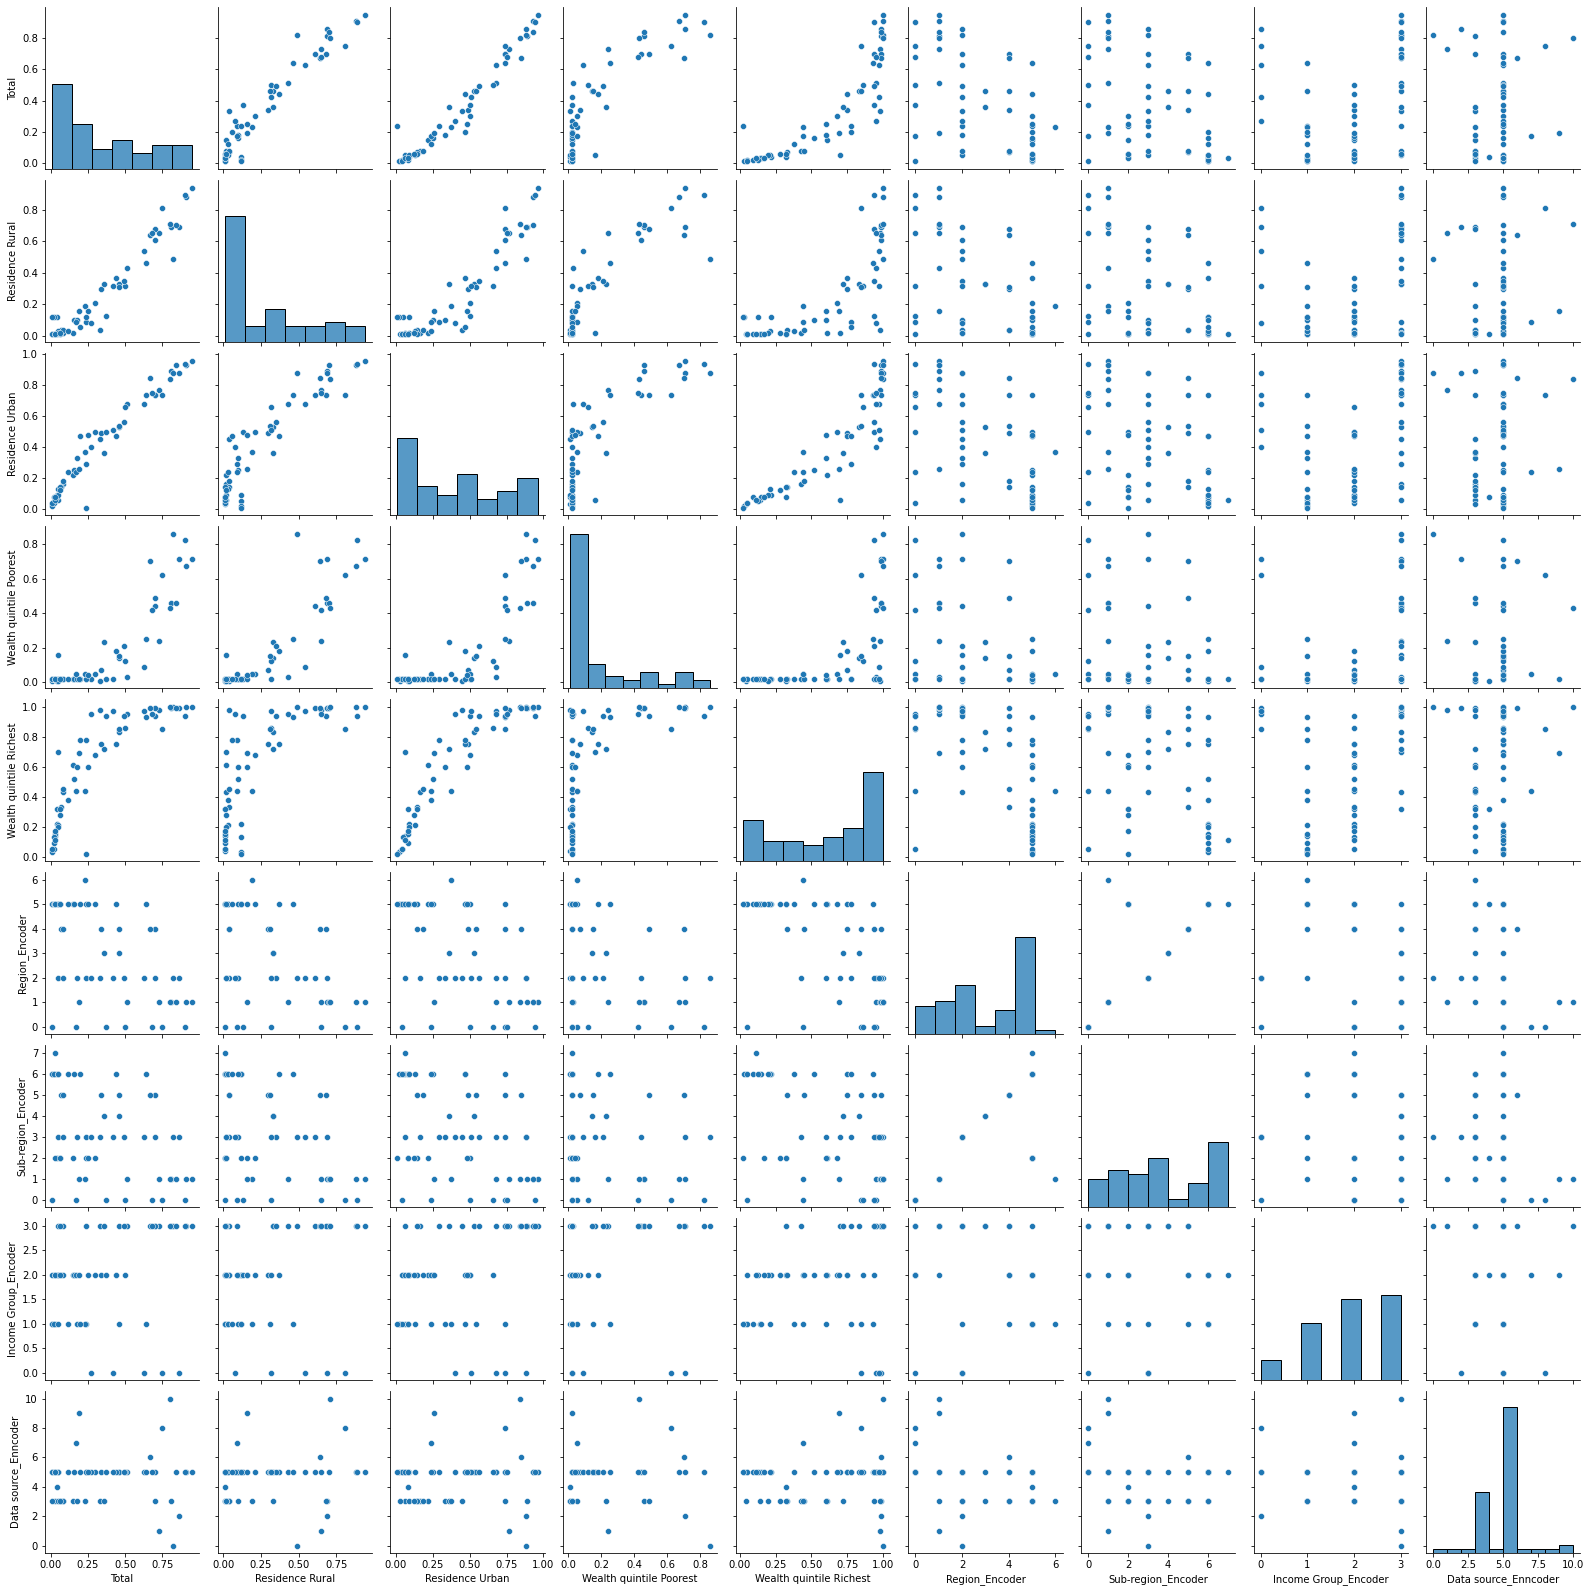

In [120]:
sns.pairplot(data_wout)

<Figure size 720x432 with 0 Axes>

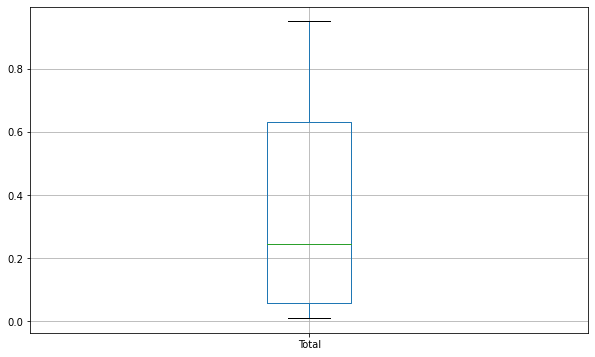

<Figure size 720x432 with 0 Axes>

In [121]:
plt.figure(figsize=(10, 6))
data_wout.boxplot(column=['Total'])
plt.figure(figsize=(10, 6))

In [124]:
sample_mean, sample_std = np.mean(data_wout['Total']), np.std(data_wout['Total'])
print(sample_mean, sample_std)

0.3426666666666666 0.29918704665959195
